# **ANSWERING QUESTION 5, 6**

---

## **IMPORT**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **ĐỌC DỮ LIỆU**

In [3]:
df = pd.read_csv('../Data/Time-Wasters on Social Media_Cleaned.csv')
df.head(5)

,Gender,Income,Profession,Platform,Total Time Spent,Number of Sessions,Video Category,Importance Score,Time Spent On Video,Number of Videos Watched,Frequency,ProductivityLoss,Satisfaction,Watch Reason,Self Control,Addiction Level,CurrentActivity,Age Group
0,Male,82812,Engineer,Instagram,80,17,Pranks,5,26,22,Night,3,7,Procrastination,5,5,Commuting,Middle Age
1,Female,27999,Artist,Instagram,228,14,Pranks,6,25,31,Afternoon,5,5,Habit,7,3,At school,Middle Age
2,Female,42436,Engineer,Facebook,30,6,Vlogs,3,9,7,Evening,6,4,Entertainment,8,2,At home,Adult
3,Male,62963,Waiting staff,YouTube,101,19,Vlogs,2,6,41,Night,3,7,Habit,5,5,Commuting,Elderly
4,Male,22096,Manager,TikTok,136,6,Gaming,7,13,21,Morning,8,2,Boredom,10,0,At home,Adult


## **Câu 5: Thời gian dành cho mạng xã hội ảnh hưởng như thế nào đến khả năng quản lý công việc và học tập?**

### **5.1. Tiền xử lý**

- **Bước 1:** Tính toán các chỉ số phân phối thời gian sử dụng

- **Bước 2:** Chia nhóm người dùng theo thời gian sử dụng


In [4]:
# Tính toán các chỉ số phân phối thời gian sử dụng
time_stats = df['Total Time Spent'].describe(percentiles=[0.25, 0.5, 0.75])
time_stats

count    1000.000000
mean      151.406000
std        83.952637
min        10.000000
25%        78.000000
50%       152.000000
75%       223.000000
max       298.000000
Name: Total Time Spent, dtype: float64

In [5]:
# Chia người dùng thành 4 nhóm theo thời gian sử dụng
df['Time Group'] = pd.cut(df['Total Time Spent'],
                          bins=[0, time_stats['25%'], time_stats['50%'], time_stats['75%'], time_stats['max']],
                          labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Kiểm tra dữ liệu
df[['Total Time Spent','Time Group']].head()


,Total Time Spent,Time Group
0,80,Medium-Low
1,228,High
2,30,Low
3,101,Medium-Low
4,136,Medium-Low


### **5.2. Trực quan hóa dữ liệu**

- Vẽ 2 biểu đồ **Bar Plot** thể hiện giá trị trung bình của mức độ mất năng suất và mức độ tự kiểm soát đối với từng nhóm thời gian sử dụng.

In [6]:
# Tính toán giới hạn cho trục y của biểu đồ để dữ liệu hiển thị rõ ràng và dễ so sánh
def calculate_ylim_bounds(df, col1, col2):
    # Tính giá trị trung bình 
    avg_self_control = df.groupby(col1)[col2].mean().reset_index()
    # Tính min và max từ các giá trị trung bình
    min_value = avg_self_control[col2].min()
    max_value = avg_self_control[col2].max()
    # Tính biên độ tự động
    margin = max_value - min_value
    return min_value - margin, max_value + margin

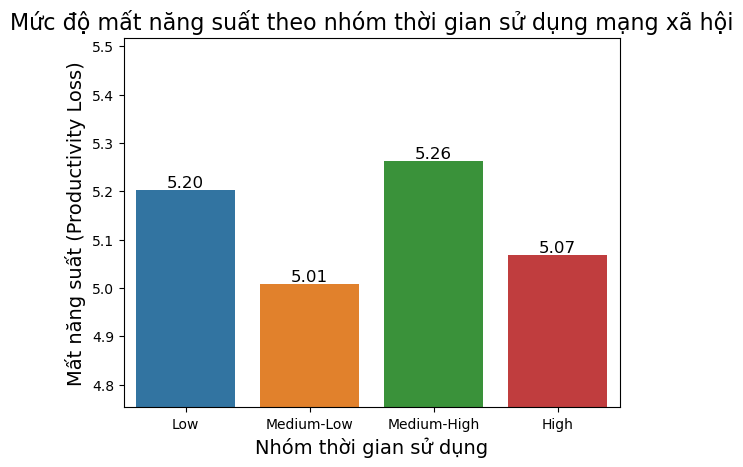

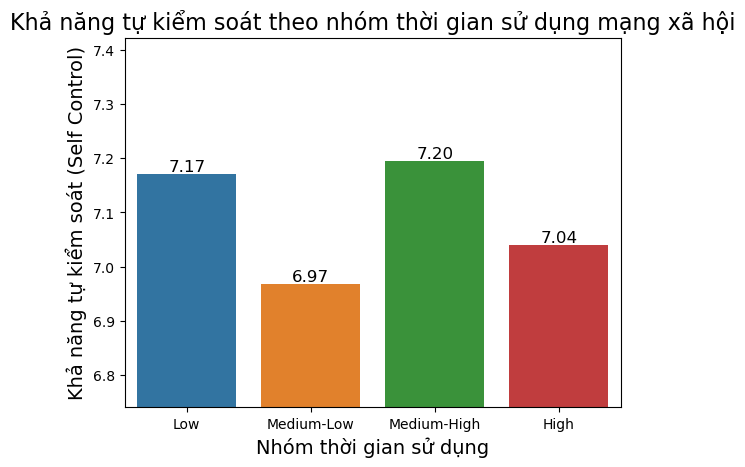

In [12]:
# Vẽ biểu đồ cột thể hiện mức độ mất năng suất (ProductivityLoss) theo nhóm thời gian sử dụng
sns.barplot(x='Time Group', y='ProductivityLoss', data=df, hue='Time Group', errorbar=None)
# Thêm các giá trị trung bình vào biểu đồ
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')

min_ylim, max_ylim = calculate_ylim_bounds(df, 'Time Group', 'ProductivityLoss')
plt.ylim(min_ylim, max_ylim)

plt.title('Mức độ mất năng suất theo nhóm thời gian sử dụng mạng xã hội', fontsize=16)
plt.xlabel('Nhóm thời gian sử dụng', fontsize=14)
plt.ylabel('Mất năng suất (Productivity Loss)', fontsize=14)
plt.show()

# Vẽ biểu đồ cột cho khả năng tự kiểm soát (Self Control) theo các nhóm Time Group
sns.barplot(x='Time Group', y='Self Control', data=df, hue='Time Group', errorbar=None)
# Thêm các giá trị trung bình vào biểu đồ
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')
    
min_ylim, max_ylim = calculate_ylim_bounds(df, 'Time Group', 'Self Control')
plt.ylim(min_ylim, max_ylim)   
     
plt.title('Khả năng tự kiểm soát theo nhóm thời gian sử dụng mạng xã hội', fontsize=16)
plt.xlabel('Nhóm thời gian sử dụng', fontsize=14)
plt.ylabel('Khả năng tự kiểm soát (Self Control)', fontsize=14)
plt.show()

### **5.3. Nhận xét**

- Có thể thấy ở các nhóm thời gian sử dụng khác (dù nhiều hay ít) thì đều có mức độ mất năng suất gần như tương tự nhau. Điều này là do các nhóm thời gian sử dụng khác nhau cũng có mức độ kiểm soát bản thân gần như ngang nhau.

- Từ đó suy ra việc sử dụng nhiều hay ít cũng ít nhiều ảnh hưởng đến sự mất năng suất nhưng không phải hoàn toàn. Có thể tùy vào mục đích sử dụng thích hợp với nhu cầu mà việc sử dụng nhiều không gây mất năng suất quá lớn.

- **Kết luận:** Dù việc sử dụng nền tảng có thể có ảnh hưởng đến năng suất, nhưng nếu người dùng có khả năng tự kiểm soát tốt và sử dụng nền tảng một cách có mục đích, mức độ mất năng suất sẽ không đáng kể. Do đó, nâng cao khả năng tự kiểm soát và cá nhân hóa trải nghiệm người dùng là các giải pháp quan trọng để cải thiện sự hiệu quả trong việc sử dụng nền tảng mà không làm giảm năng suất làm việc hoặc học tập.

## **Câu 6: Có mối liên hệ nào giữa nghề nghiệp, độ tuổi và tần suất sử dụng nền tảng không?**

### **6.1. Tiền xử lý**

- **Bước 1:** Ánh xạ dữ liệu trong cột `Frequency` từ khung thời gian ("*Morning*", "*Afteroon*", "*Evening*", "(Night)") thành những giá trị số tương ứng (1, 2, 3, 4) để thực hiện tính trung bình (*Mean*)

- **Bước 2:** Gom nhóm Dataframe theo `Age Group` và `Profession`, tạo một Dataframe mới **profession_age_freq** chứa dữ liệu về tần suất sử dụng trung bình theo từng nghề nghiệp và nhóm tuổi

In [8]:
# Chuyển đổi giá trị Frequency thành số
frequency_mapping = {'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4}
df['Frequency_Num'] = df['Frequency'].map(frequency_mapping)

# Kiểm tra dữ liệu
df[['Frequency', 'Frequency_Num']].head()

,Frequency,Frequency_Num
0,Night,4
1,Afternoon,2
2,Evening,3
3,Night,4
4,Morning,1


In [9]:
# Tính tần suất trung bình sử dụng theo nghề nghiệp và độ tuổi
profession_age_freq = df.groupby(['Profession', 'Age Group'])['Frequency_Num'].mean().unstack().round(2)

# Kiểm tra dữ liệu
profession_age_freq

Age Group,Adult,Elderly,Middle Age,Young Adult
Profession,,,,
Artist,2.56,3.25,2.47,3.50
Cashier,2.76,3.67,3.29,3.10
Engineer,3.19,2.67,3.00,2.86
Labor/Worker,2.72,3.00,2.92,2.82
Manager,2.81,3.00,2.40,2.89
Students,2.96,3.15,2.83,2.93
Teacher,2.93,2.25,2.94,2.50
Waiting staff,2.81,3.12,2.62,2.74
driver,2.88,2.67,3.02,2.80


### **6.2. Trực quan hóa dữ liệu**

- Sử dụng biểu đồ heatmap để minh họa tần suất sử dụng theo từng nghề nghiệp và nhóm tuổi.

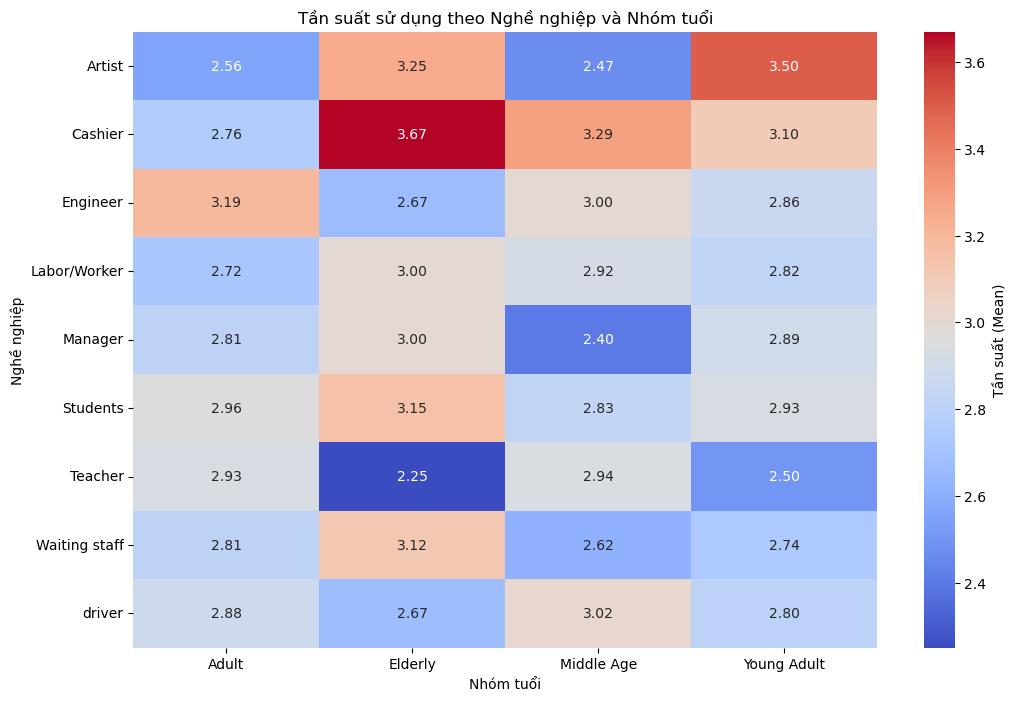

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(profession_age_freq, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Tần suất (Mean)'})
plt.title('Tần suất sử dụng theo Nghề nghiệp và Nhóm tuổi')
plt.ylabel('Nghề nghiệp')
plt.xlabel('Nhóm tuổi')
plt.show()

### **6.3. Nhận xét**

**Nghề nghiệp (Profession):** 

- Các ngành nghề như 'Artist', 'Cashier', 'Engineer', 'Student' và 'Waiting Staff' thường có xu hướng sử dụng nhiều vào buổi tối (Evening) đến khuya (Night) (giao động từ 3.1-3.7). Có thể do khoảng thời gian này các ngành nghề trên sẽ có thời gian rãnh do không cần phải đi học hay đi làm nên dành thời gian nhiều cho việc lướt mạng xã hội.

- Các ngành nghề còn lại thường có xu hướng sử dụng nhiều vào buổi chiều (Affternoon) đến tối (Nigth). Có thể do tính chất công việc nên họ thường sử dụng mạng xã hội vào khoảng thời gian đó.

**Nhóm tuổi (Age Group):**

- Hầu hết ở các ngành nghề nhóm tuổi 4 (Già) sẽ có xu hướng sử dụng nhiều vào buổi tối (Evening).

- Các nhóm tuổi còn lại thường sử dụng nhiều vào buổi chiều đến tối.

**Kết luận**:

- Nghề nghiệp và nhóm tuổi có tác động lớn đến tần suất sử dụng nền tảng vào các khung thời gian khác nhau. Dựa trên kết quả này, có thể tối ưu hóa chiến lược cá nhân hóa và cải thiện trải nghiệm người dùng bằng cách tập trung vào đặc điểm riêng của từng nghề nghiệp và nhóm tuổi.